**Transfer Learning**

Taller Final

**Asignatura: APRENDIZAJE AUTOMÁTICO-HL-20240821 0106-1 Grupo 1HL**

**Creado por**: Danny Mauricio Montero
**Código:** 2244168
**Correo:** danny.montero@uao.edu.co / danny.montero@gmail.com

**ResNet50** es una arquitectura de red neuronal convolucional (CNN) profunda que fue desarrollada por Microsoft Research en 2015. Es una variante de la popular arquitectura ResNet, que significa “Red Residual”. El “50” en el nombre se refiere a la cantidad de capas de la red, que tiene 50 capas de profundidad.

**Montar drive de google con el fin de guardar el modelo entrenado 💾**

In [ ]:
# Montar drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Instalar la version específica usada de tensorflow**

In [ ]:
!pip install tensorflow==2.15.0
import tensorflow as tf
print(tf.__version__)

2.15.0


**Importar las librerias necesarias**

In [ ]:
#Imports librerias
from tensorflow import keras
from keras import layers, Sequential
import PIL
import os
import matplotlib.pyplot as plt
import pathlib
import numpy as np

**ResNet50** es un modelo de clasificación de imágenes muy potente que puede ser entrenado con grandes conjuntos de datos y lograr resultados de vanguardia.

Una de sus innovaciones clave es el uso de conexiones residuales, que permiten a la red aprender un conjunto de funciones residuales que mapean la entrada al resultado deseado. Estas conexiones residuales permiten que la red aprenda arquitecturas mucho más profundas de lo que era posible anteriormente, sin sufrir el problema de los gradientes que desaparecen.

La arquitectura de **ResNet50** se divide en cuatro partes principales: las capas convolucionales, el bloque de identidad, el bloque convolucional y las capas completamente conectadas. Las capas convolucionales son responsables de extraer características de la imagen de entrada, mientras que el bloque de identidad y el bloque convolucional son responsables de procesar y transformar estas características.

A continuación usaremos el modelo **ResNet50** para una trasferencia de apredizaje [Transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) con con imágenes usando Keras.

Usaremos un conjunto de imágenes de flores multiclase (pertenecientes al tipo de flor) (5 clases) : ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] con un total de 3670 imágenes 🌻 🌹 🌷

La imágenes estan licenciadas bajo **Creative Commons By-Attribution License**,

El datset puede ser descargado de: https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz




Cantidad de imágenes: 3670
Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
Nombres de clase: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Image batch shape: (32, 224, 224, 3)
Labels batch shape: (32, 224, 224, 3)


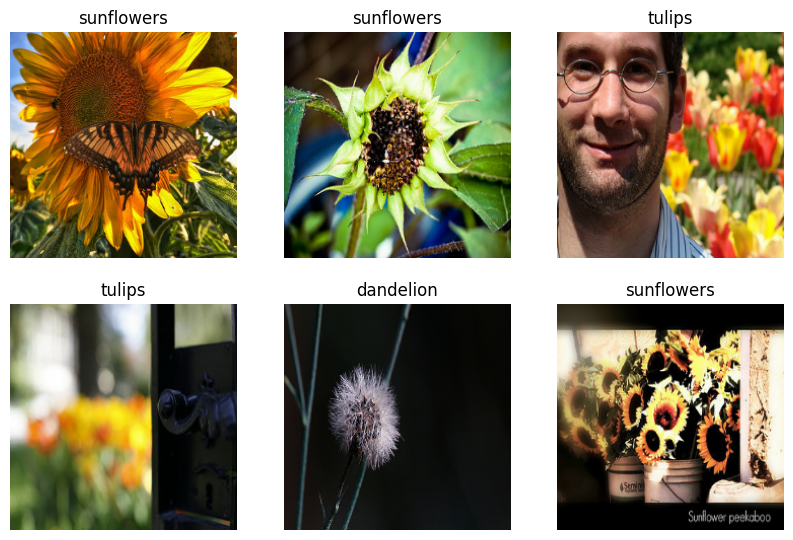

In [ ]:
dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
directory = tf.keras.utils.get_file('flower_photos', origin=dataset, untar=True)
data_directory = pathlib.Path(directory)

image_count = len(list(data_directory.glob('*/*.jpg')))

print("Cantidad de imágenes: {0}".format(image_count))

roses = list(data_directory.glob('roses/*'))
daisy = list(data_directory.glob('daisy/*'))

# definimos el tammaño de las imagene y el tamaño de batch
img_height, img_width = 224, 224
batch_size = 32


# dividimos el conjunto entrenamiento y validacion
train_ds, validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,# 20% de la data se usará para validación
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print(type(train_ds))

# obtener los nmbres de clase
class_names = train_ds.class_names
print("Nombres de clase: {0}".format(class_names))

for image_batch, labels_batch in train_ds.take(1):
    print("Image batch shape: {0}".format(image_batch.shape))
    print("Labels batch shape: {0}".format(image_batch.shape))


# Dibujamos imágenes del dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

A continuacion configuramos y entrenamos el modelo en **10 épocas**

In [ ]:
#  Creamos el modelo ResNet50 y establecemos las capas para que no se puedan entrenar
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  pooling='avg',
                                                  weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)



# Añadir capas completamente conectadas para la clasificación
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(5, activation='softmax'))

# Cantidad de épocas de entrenamiento
_epochs = 10

# Compilamos y entrenamos el modelo
opt = keras.optimizers.Adam(learning_rate=0.011)
resnet_model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=_epochs)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 684s 7s/step - loss: 2.1291 - accuracy: 0.7721 - val_loss: 0.3755 - val_accuracy: 0.8706
Epoch 2/10
92/92 [==============================] - 669s 7s/step - loss: 0.3352 - accuracy: 0.8822 - val_loss: 0.5426 - val_accuracy: 0.8188
Epoch 3/10
92/92 [==============================] - 691s 8s/step - loss: 0.2113 - accuracy: 0.9244 - val_loss: 0.3885 - val_accuracy: 0.8801
Epoch 4/10
92/92 [==============================] - 674s 7s/step - loss: 0.1827 - accuracy: 0.9346 - val_loss: 0.4024 - val_accuracy: 0.8951
Epoch 5/10
92/92 [==============================] - 669s 7s/step - loss: 0.1890 - accuracy: 0.9298 - val_loss: 0.6185 - val_accuracy: 0.8638
Epoch 6/10
92/92 [==============================] - 664s 7s/step - loss: 0.1426 - accuracy: 0.9479 - val_loss: 0.5295 - val_accuracy: 0.8733
Epoch 7/10
92/92 [==============================] - 660s 7s/step - loss: 0.0785 - accuracy: 0.9738 - val_loss: 0.6528 - val_accuracy: 0.8828
Epoch 8/10
92/92 [======

Una vez entrenado el modelos verificamos las medidas de **Accuracy** y **Loss** graficamente para cada época del entrenamiento.

[0.7721389532089233, 0.8821526169776917, 0.9243869185447693, 0.9346048831939697, 0.9298365116119385, 0.9478882551193237, 0.9737738370895386, 0.9594686627388, 0.9448229074478149, 0.9710490703582764]
[0.8705722093582153, 0.8188011050224304, 0.8801090121269226, 0.8950953483581543, 0.863760232925415, 0.8732969760894775, 0.8828337788581848, 0.8446866273880005, 0.8732969760894775, 0.8869209885597229]


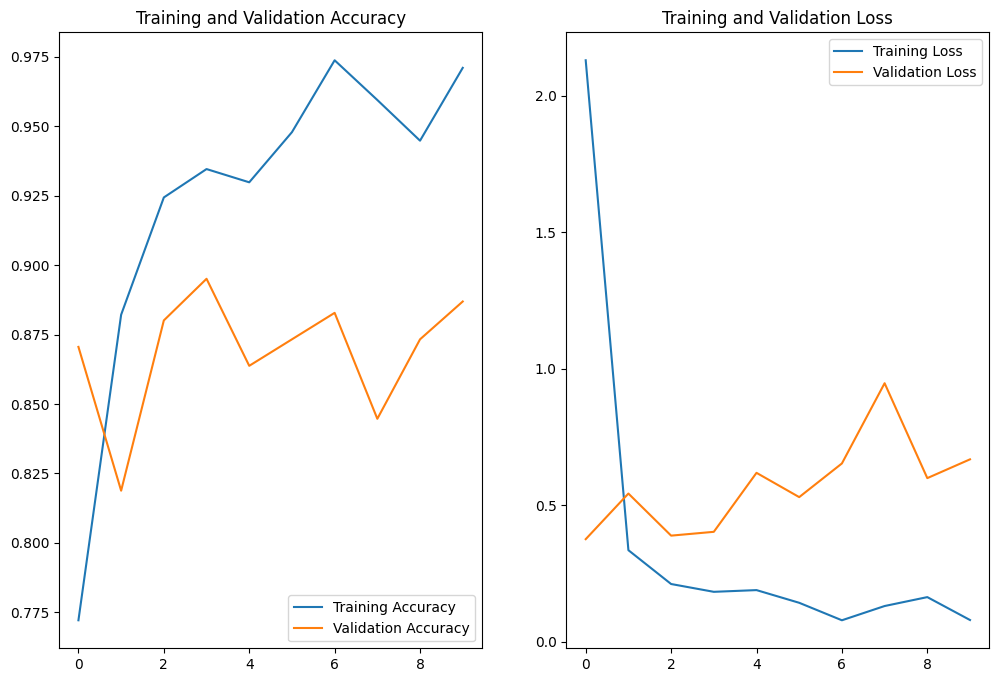

1/1 [==============================] - 1s 1s/step
La clase prevista es: roses


In [ ]:
# Evaluamos el modelo
acc = history.history['accuracy']
print(acc)
val_acc = history.history['val_accuracy']
print(val_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(_epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Inferencia
# Preprocesar imágen
import cv2
image = cv2.imread(str(roses[4]))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)


# Ejecutar predicción
image_pred = resnet_model.predict(image)


# Producir una etiqueta de salida legible para humanos
image_output_class = class_names[np.argmax(image_pred)]
print("La clase prevista es: {0}".format(image_output_class))

Guardamos el modelos en formato **keras y h5**

In [ ]:
# Guardar modelos en el drive
resnet_model.save('/content/drive/MyDrive/ResNet50/model/RESNET50.keras')
resnet_model.save('/content/drive/MyDrive/ResNet50/model/RESNET50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Verificamos el modelo cargandolo desde el drive  donde fue guardado en el paso anterior.

---



---



In [ ]:
# caragr modelo del drive
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/ResNet50/model/RESNET50.keras")

Ejecutamos una predicción para verificar el funcionamiento ✌

In [ ]:
# ejecutar predicción
image_predr = reconstructed_model.predict(image)

# Producir una etiqueta de salida legible para humanos
image_output_classr = class_names[np.argmax(image_predr)]
print("La clase prevista es: {0}".format(image_output_classr))

1/1 [==============================] - 1s 1s/step
La clase prevista es: roses
